In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
df  = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
##Encoding the the Dependent Feature
# setosa = 0
# versicolor = 1
# virginica = 2

df['species'] = df['species'].map({'setosa': 0,'versicolor': 1,'virginica': 2})
df['species'].unique()

array([0, 1, 2])

In [40]:
## Creating Independent and Dependent Feature
X = df.iloc[:,:-1] # Independent Features
Y = df.iloc[:,-1] # Dependent Features

In [41]:
## Train-Test_Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [42]:
## Creating instance of Decision Tree
from sklearn.tree import DecisionTreeClassifier
## If we do not change any parameters of decision tree the default parameters are set for Post Pruning 
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0

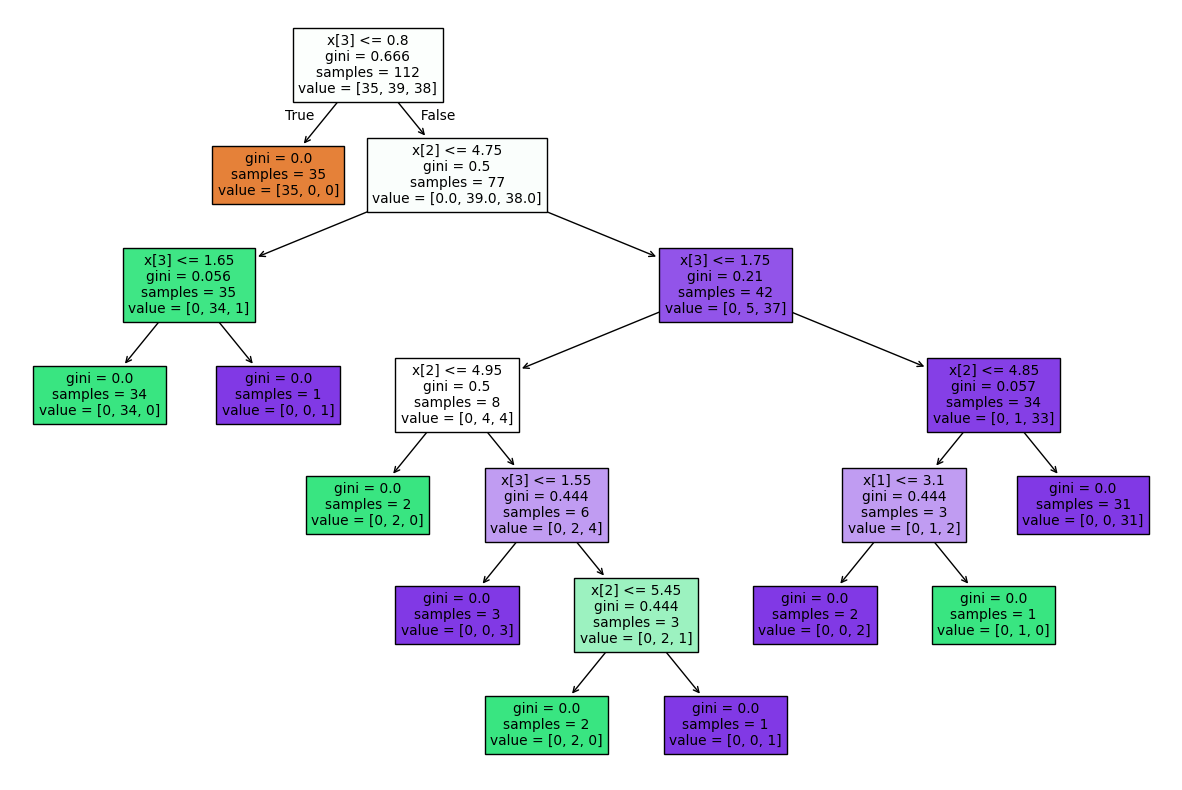

In [43]:
##Visualing the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)


#### 1.X[] is the feature used for splitting for example x[3] = 	petal_width
#### 2.Here Value = [35,39,38] is the no. of samples belonging to each target category i.e.,35(0,Satosa),39(1,versicolor),38(2,verginica)

#### As we can see at the deapth of 2 the classes are alomost perfectly calssifies(value = [0,34,1], value = [0,5,37]) so we do not need to further split the tree as ratio of the classes is very high so we will prune the tree after the deapth of 2.


In [44]:
## Post Pruning
treemodel_2 = DecisionTreeClassifier(max_depth=2)
treemodel_2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.21\nsamples = 42\nvalue = [0, 5, 37]')]

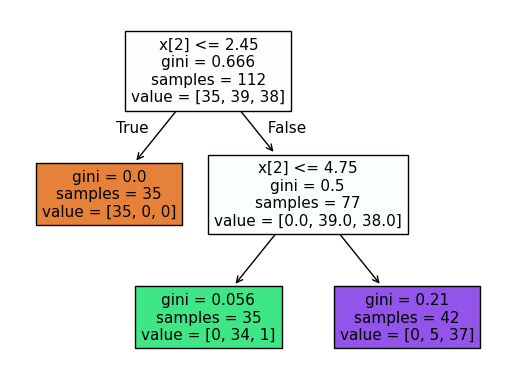

In [45]:
plt.Figure(figsize=(15,10))
tree.plot_tree(treemodel_2,filled=True)

In [46]:
## Predicting For test data
Y_pred = treemodel_2.predict(X_test)

In [51]:
## Checking Accuracy
from sklearn.metrics import accuracy_score,classification_report
Accuracy = accuracy_score(Y_test,Y_pred)
Report = classification_report(Y_test,Y_pred)
print(f'Accuracy:{Accuracy}\nReport:\n{Report}')

Accuracy:0.9736842105263158
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

